705
(705, 1536) (705, 6)
data shape (1068, 6) (1058, 1536)


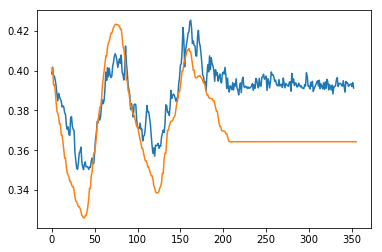

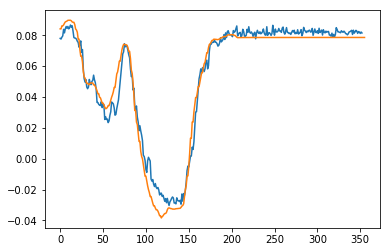

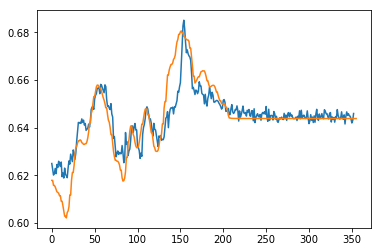

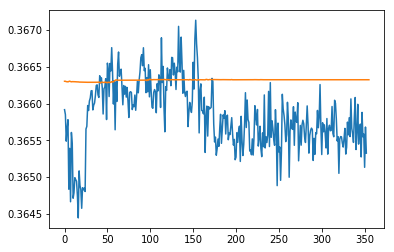

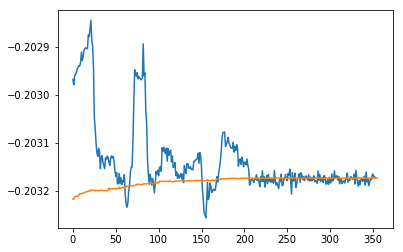

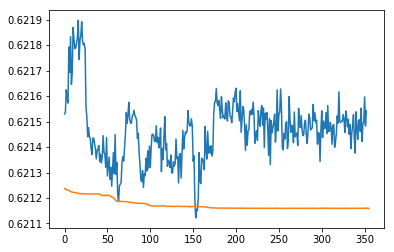

In [15]:
import os, cv2
import matplotlib.pyplot as plt
import numpy as np

def same_size(X,y):
    minlength = min(y.shape[0],X.shape[0])
    print minlength
    y = y[:minlength]
    X = X[:minlength]
    return X,y

def load_model(data_name):
    data = np.load(data_name)
    pos = data['pos']
    feat = data['feat']
    X_train = feat[:len(feat)*2/3]
    y_train = pos[:len(pos)*2/3]
    X_train, y_train = same_size(X_train, y_train)
    print X_train.shape, y_train.shape

    # begin training
    from sklearn import linear_model
    model = linear_model.Lasso(alpha = 1)
    model.fit(X_train, y_train)
    return model

data_name = 'cloth_0813/1137/data2_float_40_bg.npz'
model = load_model(data_name)
data = np.load(data_name)
pos = data['pos']
feat = data['feat']
print 'data shape', pos.shape,feat.shape
# Use the model to predict the velocity/direction of end effector
X = feat[len(feat)*2/3:]
y = pos[len(pos)*2/3:]
y_pred = model.predict(X)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(y.shape[0]),y[:,i])
    plt.show()

1058


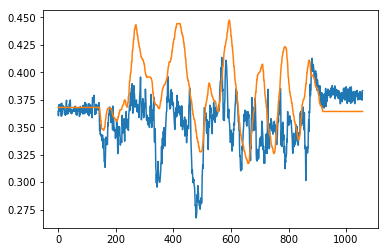

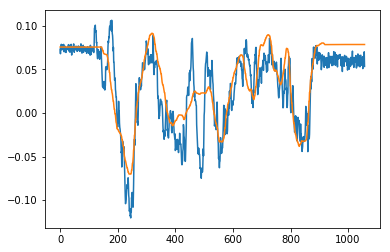

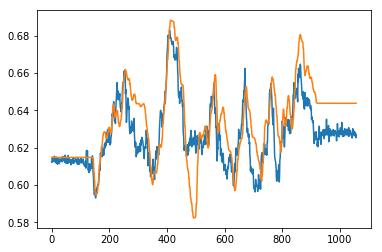

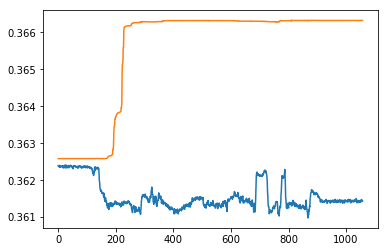

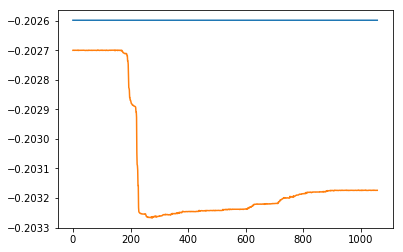

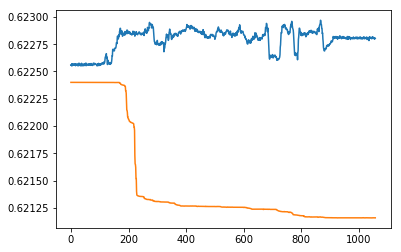

In [8]:
# Another dataset to fit
data = np.load('cloth_0813/1137/data2_float_40_bg.npz')
feat = data['feat']
pos = data['pos']
# Use the model to predict the velocity/direction of end effector
target = 0  # target index  
X = feat
y = pos

X,y = same_size(X,y)

#compute the gradient of the feature vector
y_pred = model.predict(X)



#y_pred = uniform_filter1d(y_pred,30)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(len(y)),y[:,i])
    plt.show()